# Predicting the Geothermal Heat Flux in Greenland: A Machine Learning Approach

Soroush Rezvanbehbahani, Leigh A. Stearns, Amir Kadivar, J. Doug Walker and C. J. van der Veen




# Highlights


Global Heat Flux (GHF) shows the internal heat flow associated with the earth. GHF in turn can be used to predict the loss of ice sheets due to the earth's heat at a certain place. However access to GHF observations is quite limited in places which have thick ice sheets due to the limited area of bedrock. Greenland is such a place which require intensive studies to estimate the GHF. Numerical models can only do so much with limited information that there needs a more robust method to estimate these values. 

Machine Learning methods are used as an effective way to estimate the value of GHF in these isolated locations. In this paper the example of Greenland's Nioghalvfjerdsfjorden glacier and some of its surrounding areas are estimated by using Gradient Boosted Regression by learning GHF's from other values accross the globe. The results show that the GHF can be estimated to as close as 15% within the real values.  

# Data Description

**GHF Global Data**

This is the only dataset we use which is compiled by the authors of the world wide GHF observations and a few sites in greenland. The dataset contains geological features such as crustal thickness, magnetic anomaly, gravity field, rock type, age, elevation, and proximity to spreading ridge. We train using these features so we can approximate GHF. 

# Algorithm

citation: https://en.wikipedia.org/wiki/Gradient_boosting


**Gradient Boosting Regression($X_m$, y):**

step 1 $\rightarrow$ Assuming the first fit of the model is slightly better than random create a base model $F_{0}(x) = arg min \sum_{i-1}^{n}L(y_i,\gamma)$

step 2 $\rightarrow$ For m=1 to M:

 1. Find Pseudo-Residuals $r_{im} = - \frac{\delta L(y_{i},F(X_i))}{\delta F(x_i)}_{F(x)=F_{M-1(X)}}$  for $i=1,....n$
 2. Fit a weak learner like a tree $h_m(x)$ to pseudo-residuals
 
 3. Compute multiplier $\gamma_m$ by optimization
 
     $\gamma_{m} = arg min \sum_{i-1}^{n}L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))$
 
 4. Update the model:
 $F_m (x) = F_{m-1}(x) + \gamma_m h_m(x)$
 
step 2 $\rightarrow$ Return $F_M(x)$

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from mpl_toolkits.basemap import Basemap
#import mpl_toolkits
#mpl_toolkits.__path__.append('/home/rahulaedula95/anaconda3/envs/my_env/lib/python3.6/site-packages/mpl_toolkits/')
#import cartopy.crs as ccrs

In [2]:
global_data = pd.read_csv('data/global.csv',index_col='FID')
global_data

,thermo_tecto_age,thickness_upper_crust,thickness_middle_crust,upper_mantle_density_anomaly,d_2_ridge,d_2_trench,d_2_trans_ridge,d_2_volcano,d_2_hotspot,heat_prod_provinces,...,lat,GHF,upper_mantle_vel_structure,rock_type,age,magnetic_anomaly,depth_to_moho,lithos_asthenos_bdry,bougeur_gravity_anomaly,topography
FID,,,,,,,,,,,,,,,,,,,,,
0,1.0,12.999,13.000,0.0608,2048.46,2135.04,3879.25,1764.58,30.504098,1.98,...,75.500122,54.000000,2.0,3.0,2.297060,-1.698360,-42.095402,219571.00000,110.143997,76.226402
1,1.0,12.999,13.000,0.0608,2048.46,2135.04,3879.25,1764.58,30.504098,1.98,...,75.500122,57.500000,2.0,3.0,2.277860,-13.700700,-42.294998,237790.00000,114.978996,71.403198
2,1.0,13.000,13.000,0.0383,2056.02,2063.41,3853.50,1708.09,30.438463,1.98,...,74.500122,56.000000,2.0,3.0,2.282202,17.431999,-26.982100,245314.00000,119.232002,-151.248001
3,1.0,13.000,12.000,0.0343,1872.02,2567.14,4110.06,2071.42,34.677082,1.98,...,74.500122,118.167000,2.0,3.0,2.118015,-64.813202,-30.231199,183278.00000,123.305000,-74.843300
4,1.0,10.000,9.500,0.0059,2057.43,1913.82,3817.14,1585.16,25.700195,1.01,...,74.500122,46.530899,2.0,3.0,2.740498,10.648300,-31.743000,242293.00000,114.766998,139.421997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,1.0,8.500,8.502,-0.0727,1484.39,4639.52,1754.06,226.68,5.522680,2.32,...,-46.500000,75.269200,3.0,3.0,1.897233,-74.271202,-36.190201,69162.79688,89.410698,857.000000
4032,1.0,8.000,7.998,-0.0756,1469.81,4624.86,1753.49,216.77,4.527693,2.32,...,-46.500000,75.130800,3.0,1.0,1.869254,-25.160299,-32.507702,69681.39844,68.540298,985.000000
4033,1.0,8.000,7.998,-0.0728,1455.81,4609.94,1753.66,210.30,3.535534,2.32,...,-46.500000,75.089500,6.0,1.0,1.847295,-44.879601,-29.178200,65409.19922,134.682007,294.000000


In [3]:
X = global_data.drop(['GHF'],axis=1)
y = global_data['GHF']


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=11)



clf = LinearRegression()

clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))


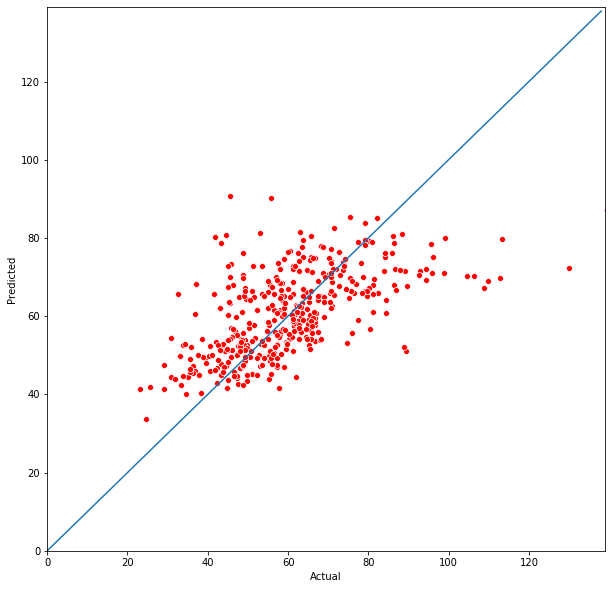

In [5]:
plotter  = pd.DataFrame()
plotter['Actual'] = y_test
plotter['Predicted'] = y_pred
plt.figure(figsize=(10, 10))
plt.xlim(0,max(int(max(y_test)),int(max(y_pred))))
plt.ylim(0,max(int(max(y_test)),int(max(y_pred))))
sns.scatterplot(x='Actual',y='Predicted',data=plotter,color='red')
sns.lineplot(x=range(0,max(int(max(y_test)),int(max(y_pred)))),y = range(0,max(int(max(y_test)),int(max(y_pred)))))


Figure 1 scatterplot of Linear Regression on GHF data. X axis = actual GHF, Y axis = Predicted GHF

/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


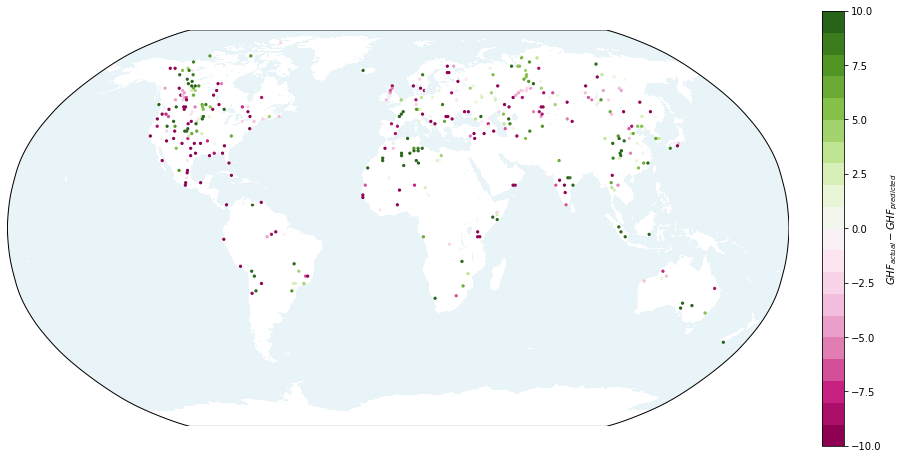

In [6]:
lat = X_test['lat'].values
lon = X_test['lon'].values
fig = plt.figure(figsize=(15, 15))
center = (28.67, 45.5)
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawlsmask(land_color = "#ffffff",
               ocean_color="#e8f4f8",
               resolution = 'l')

diff_cmap = plt.get_cmap('PiYG', 20)
scatter_args = {'marker': 'o', 's': 15, 'lw': 0.25, 'edgecolor':'black','cmap': diff_cmap}
x,y = m(X_test.lon.as_matrix(), X_test.lat.as_matrix())
m.scatter(x,y,marker='o', s=5, c=y_test-y_pred, cmap=diff_cmap)
plt.colorbar(label=r'$GHF_{actual} - GHF_{predicted}$', fraction=0.026, pad=0.04)
plt.clim(-10, 10)


Figure 1 reproduction of Basemap plot for Linear Regression. The points are differences in prediction $(GHF - GHF_{predicted})$ for the test set. As close to white means better prediction 

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(loss='ls',learning_rate=0.05,n_estimators=1000,subsample=1,max_depth=4,max_features=0.3,verbose=0)

clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))


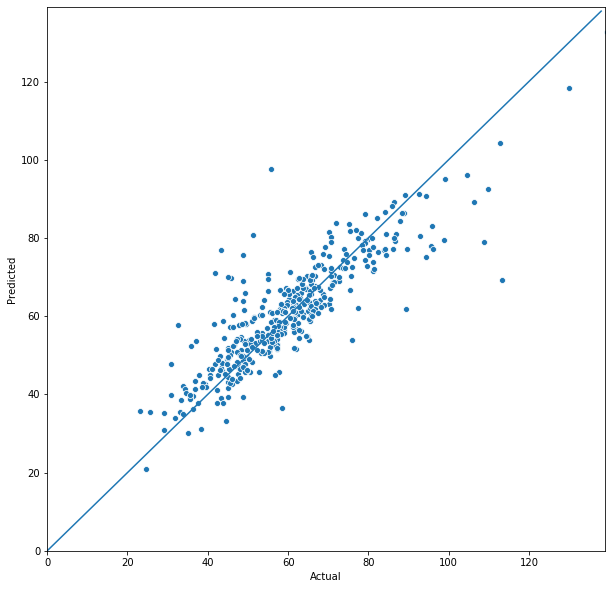

In [8]:
plotter  = pd.DataFrame()
plotter['Actual'] = y_test
plotter['Predicted'] = y_pred
plt.figure(figsize=(10, 10))
plt.xlim(0,max(int(max(y_test)),int(max(y_pred))))
plt.ylim(0,max(int(max(y_test)),int(max(y_pred))))
sns.scatterplot(x='Actual',y='Predicted',data=plotter)
sns.lineplot(x=range(0,max(int(max(y_test)),int(max(y_pred)))),y = range(0,max(int(max(y_test)),int(max(y_pred)))))


Figure 1 scatterplot of Gradient Boosted Regression on GHF data. X axis = actual GHF, Y axis = Predicted GHF

/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


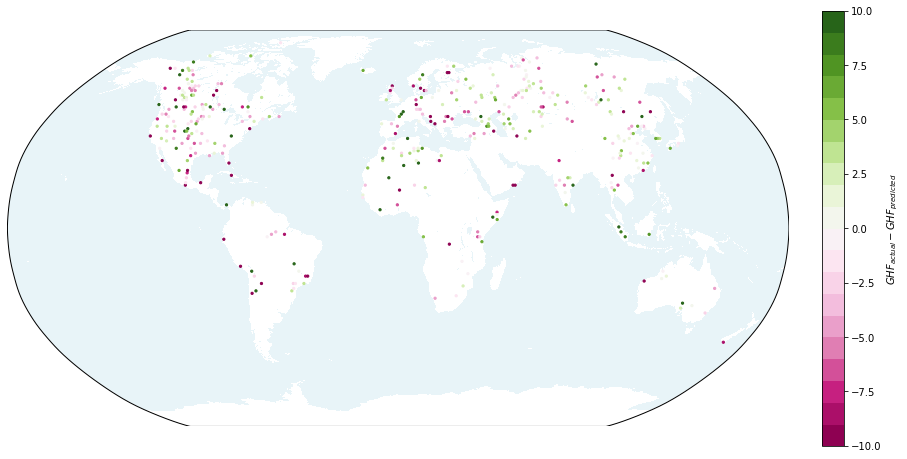

In [9]:
lat = X_test['lat'].values
lon = X_test['lon'].values
fig = plt.figure(figsize=(15, 15))
center = (28.67, 45.5)
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawlsmask(land_color = "#ffffff",
               ocean_color="#e8f4f8",
               resolution = 'l')

diff_cmap = plt.get_cmap('PiYG', 20)
scatter_args = {'marker': 'o', 's': 15, 'lw': 0.25, 'edgecolor':'black','cmap': diff_cmap}
x,y = m(X_test.lon.as_matrix(), X_test.lat.as_matrix())
m.scatter(x,y,marker='o', s=5, c=y_test-y_pred, cmap=diff_cmap)
plt.colorbar(label=r'$GHF_{actual} - GHF_{predicted}$', fraction=0.026, pad=0.04)
plt.clim(-10, 10)


Figure 1 reproduction of Basemap plot for Gradient Boosted Regression. The points are differences in prediction $(GHF - GHF_{predicted})$ for the test set. As close to white means better prediction 

In [10]:
from sklearn.neighbors import DistanceMetric
from math import radians
from sklearn.metrics.pairwise import haversine_distances
print (global_data.columns)
def convert_haversine(x):
    lat = radians(x[0])
    lon = radians(x[1])
    c_lat = radians(28.67)
    c_lon = radians(45.5)
    
    k = [[c_lat,c_lon],[lat,lon]]
    return (haversine_distances(k)[0][1] * 6367)

#global_data['haversine_distance'] = global_data[['lat','lon']].apply(convert_haversine,axis=1)
#global_data['haversine_distance']
    

Index(['thermo_tecto_age', 'thickness_upper_crust', 'thickness_middle_crust',
       'upper_mantle_density_anomaly', 'd_2_ridge', 'd_2_trench',
       'd_2_trans_ridge', 'd_2_volcano', 'd_2_hotspot', 'heat_prod_provinces',
       'thickness_crust', 'd_2_young_rift', 'lon', 'lat', 'GHF',
       'upper_mantle_vel_structure', 'rock_type', 'age', 'magnetic_anomaly',
       'depth_to_moho', 'lithos_asthenos_bdry', 'bougeur_gravity_anomaly',
       'topography'],
      dtype='object')


In [11]:
def roi_density_to_test_size(density, radius, num_samples):
    """ Translates ROI density (sample per 1e6 km^2) for a given radius (km) to
        a test_size parameter (between 0 and 1) acceptable by `train_test_split`
        to partition within-ROI samples to a validation set and a supplementary
        within-ROI training data.
    """
    area = np.pi * (radius / 1000.) ** 2
    test_size = 1 - (area * density) / num_samples
    max_density = num_samples / area
    #assert max_density >= density, \
    #    'demanded density (%.2f) larger than max density in ROI (%.2f)' % (density, max_density)
    return test_size

In [12]:
def split_by_distance(data, center, radius):
    """ Returns a pair of data frames, one containing rows in data that are
        closer than radius to center, and the other containing those that are
        not.
        Args:
            data (pandas.DataFrame): the entire data set.
        Return:
            (within, beyond):
                two data frames resulting from partitioning the data set to
                within ROI and beyond ROI.
    """
    # store distances in a temporary column '_distance'
    data['_distance'] = haversine_distances(data, center)
    within = data[data._distance < radius].drop('_distance', axis=1)
    beyond = data[data._distance > radius].drop('_distance', axis=1)
    data.drop('_distance', axis=1, inplace=True)

    return within, beyond

In [13]:
def haversine_distance(p1, p2):
    """ Calculates the haversine distance (in km) between two
        longitutde-latitude pairs. Each argument is an iterable with two
        entries: the longitude and the latitude of the corresponding point
    """
    lon1, lat1 = p1
    lon2, lat2 = p2
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * math.asin(np.sqrt(a))
    km = 6367 * c
    return km

def haversine_distances(data, center):
    """ Returns a column containing distances of each row of data from center.
    """
    def _haversine(row):
        p = row[['lon', 'lat']].as_matrix()
        return haversine_distance(p, center)

    return data.apply(_haversine, axis=1)


In [14]:
def split_with_circle(data, center, roi_density=None, radius=3500):
    """ Splits rows in data into a training and test set according to the
        following rule: consider an ROI with given center and radius. The
        training set is those rows outside ROI and a randomly chosen subset of
        those rows within ROI (proportion of points in ROI kept for test is
        calculated based on demanded ensity).
        Args:
            data (pandas.DataFrame): the entire data set.
            center (tuple): lon-lat coordinates of ROI center.
            roi_density (float): required density, cf. roi_density_to_test_size
        Return:
            (X_train, y_train, X_test, y_test):
            A tuple of 4 data frames of dimensions nxp, nx1, (N-n)xp, (N-n)x1
            where N is the total number of records, n is the number of training
            records and p is the number of features.
    """
    data_test, data_train = split_by_distance(data, center, radius)
    test_size = roi_density_to_test_size(roi_density, radius, len(data_test))
    assert test_size > 0
    if test_size < 1:
        additional_train, reduced_data_test = train_test_split(
            data_test, random_state=0, test_size=test_size
        )
        data_train = pd.concat([data_train, additional_train])
        data_test = reduced_data_test

    X_train, y_train = data_train.drop('GHF', axis=1), data_train['GHF']
    X_test,  y_test  = data_test.drop('GHF', axis=1),  data_test['GHF']

    return X_train, y_train, X_test, y_test


In [15]:
def plot_values_on_map(m, lons, lats, values,
                    parallel_step=20., meridian_step=60.,
                    clim=(20., 150.), clim_step=10,
                    colorbar_args={}, scatter_args={}, cbar_label='mW m$^{-2}$'):
    """ Plots a series of values at given latitude and longitude positions on a
        given basemap object as points.
        Args:
            m (basemap.Basemap): map object to draw data on.
            lons: one-dimensional list (native, numpy, or pandas) of longitudes.
            lons: similar, latitudes.
            ghfs: similar, GHF values.
    """
    m.drawparallels(
        np.arange(-80., 81., parallel_step), labels=[1, 0, 0, 0], fontsize=10
    )
    m.drawmeridians(
        np.arange(-180., 181., meridian_step), labels=[0, 0, 0, 1], fontsize=10
    )
    m.drawmapboundary(fill_color='white')
    m.drawcoastlines(linewidth=0.5)

    x, y = m(lons, lats)

    cs = m.scatter(x, y, c=values, **scatter_args)

    cbar = m.colorbar(cs, **colorbar_args)
    cbar.set_label(cbar_label)
    labels = range(int(clim[0]), int(clim[1]) + 1, clim_step)
    cbar.set_ticks(labels)
    cbar.set_ticklabels(labels)
    plt.clim(*clim)
    plt.show()

center:  (28.67, 45.5)


/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


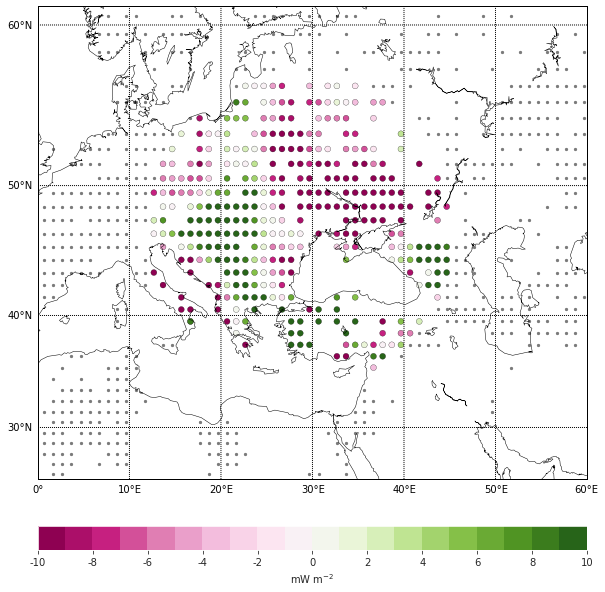

center:  (28.67, 45.5)


/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


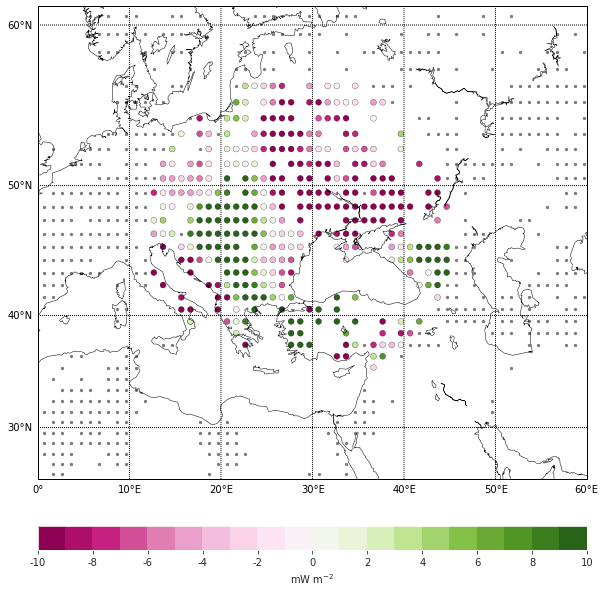

center:  (28.67, 45.5)


/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


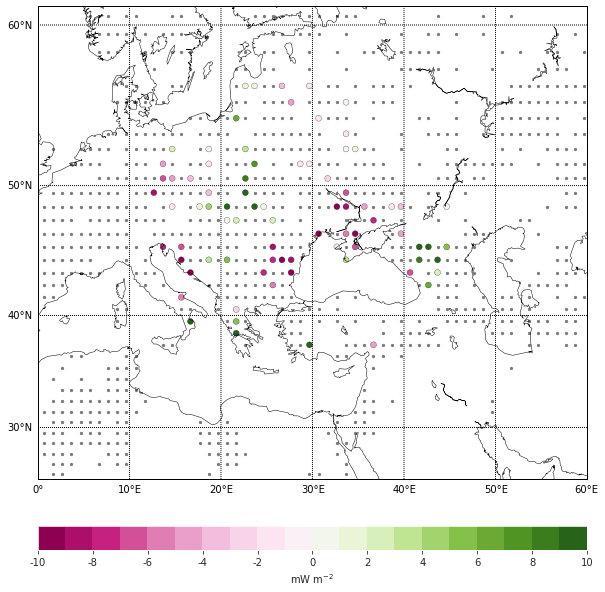

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
#from circlemap import 
import math
from matplotlib.patches import Circle

COLORBAR_ARGS = {'location': 'bottom', 'pad': '10%'}

#roi_densities = [0]
roi_densities = [0,1,50]
GREENLAND_RADIUS = 1300

for roi_density in roi_densities:
    
    
        
    print ('center: ', center)
    X_train, y_train, X_test, y_test = split_with_circle(global_data, center,
                                       roi_density=roi_density, radius=GREENLAND_RADIUS)
    
    clf = GradientBoostingRegressor(loss='ls',learning_rate=0.05,n_estimators=1000,subsample=1,max_depth=4,max_features=0.3,verbose=0)

    clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
    y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))
    
    #r2, rmse = error_summary(y_test, y_pred)
    
    fig = plt.figure(figsize=(10, 10))
    #fig,ax = plt.subplots()
    m = Basemap(projection='merc',lat_0=center[0], lon_0=center[1],
                resolution = 'l', area_thresh = 1000.0,
                llcrnrlon=0, llcrnrlat=25,
                urcrnrlon=60, urcrnrlat=61)

    m.drawlsmask(land_color = "#ffffff",
                   ocean_color="#e8f4f8",
                   resolution = 'l')

    x,y = m(X_train.lon.as_matrix(), X_train.lat.as_matrix())
    m.scatter(x,y,marker='o', s=5, color='#7a7a7a')

    diff_cmap = plt.get_cmap('PiYG', 20)
    scatter_args = {'marker': 'o', 's': 35, 'lw': 0.25, 'cmap': diff_cmap,'edgecolor': 'k'}
    colorbar_args = {'location': 'bottom', 'pad': '5%'}
    plot_values_on_map(m,
                       X_test.lon.as_matrix(), X_test.lat.as_matrix(),
                       y_test - y_pred,
                       clim=(-10, 10), clim_step=2,
                       parallel_step=10., meridian_step=10.,
                       colorbar_args=COLORBAR_ARGS,
                       scatter_args=scatter_args)
    
    x,y=m(center[0],center[1])
    x2,y2 = m(center[0],center[1]+GREENLAND_RADIUS) 
    circle1 = plt.Circle((x, y), y2-y, color='black',fill=False)
    ax.add_patch(circle1)
    plt.show()
    
    
    
    
#     global_test = global_data[global_data['haversine_distance']<radius]
#     global_train = global_data[global_data['haversine_distance']>radius]
#     print (len(global_test))
    
#     test_size = roi_density_to_test_size(roi, radius, len(global_test))
    
#     print (test_size)
#     assert test_size > 0
#     if test_size < 1:
#         additional_train, reduced_data_test = train_test_split(
#             global_test, random_state=0, test_size=test_size
#         )
#         global_train = pd.concat([global_train, additional_train])
#         global_test = reduced_data_test

#     X_train, y_train = global_train.drop('GHF', axis=1), global_train['GHF']
#     X_test,  y_test  = global_test.drop('GHF', axis=1),  global_test['GHF']
    
    
#     m = Basemap(projection='merc',lat_0=center[0], lon_0=center[1],
#                 resolution = 'l', area_thresh = 1000.0,
#                 llcrnrlon=0, llcrnrlat=25,
#                 urcrnrlon=60, urcrnrlat=61)

#     m.drawlsmask(land_color = "#ffffff",
#                    ocean_color="#e8f4f8",
#                    resolution = 'l')

#     x,y = m(X_train.lon.as_matrix(), X_train.lat.as_matrix())
#     m.scatter(x,y,marker='o', s=5, color='#7a7a7a')
    
#     diff_cmap = plt.get_cmap('PiYG', 20)
#     scatter_args = {'marker': 'o', 's': 35, 'lw': 0.25, 'cmap': diff_cmap,'edgecolor': 'k'}
#     colorbar_args = {'location': 'bottom', 'pad': '5%'}
#     plot_values_on_map(m,
#                        X_test.lon.as_matrix(), X_test.lat.as_matrix(),
#                        y_test - y_pred,
#                        clim=(-10, 10), clim_step=2,
#                        parallel_step=10., meridian_step=10.,
#                        colorbar_args=colorbar_args,
#                        scatter_args=scatter_args)
    
    

    
    

Figure 2 reproduction, changing the $\rho$ Densities while keeping a test set with a constant radius of 1300 km. The points show the difference in actual vs predicted values for GBRT. 

In [59]:
%%capture
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
#from circlemap import 
import math
from matplotlib.patches import Circle
metric_list = []
roi_list = []
clf_list = []
COLORBAR_ARGS = {'location': 'bottom', 'pad': '10%'}

#roi_densities = [0]
roi_densities = range(5,50,5)
GREENLAND_RADIUS = 1300

for roi_density in roi_densities:
    
    
        
    print ('center: ', center)
    X_train, y_train, X_test, y_test = split_with_circle(global_data, center,
                                       roi_density=roi_density, radius=GREENLAND_RADIUS)
    
    clf = GradientBoostingRegressor(loss='ls',learning_rate=0.05,n_estimators=1000,subsample=1,max_depth=4,max_features=0.3,verbose=0)

    clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
    y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))
    
    metric_list.append(sqrt(mean_squared_error(y_test,y_pred))/np.average(y_test))    
    clf_list.append('GBRT')
    roi_list.append(roi_density)
    
    clf = LinearRegression()

    clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
    y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))

    
    #r2, rmse = error_summary(y_test, y_pred)
    metric_list.append(sqrt(mean_squared_error(y_test,y_pred))/np.average(y_test))
    roi_list.append(roi_density)
    clf_list.append('Linear')
    
                
    

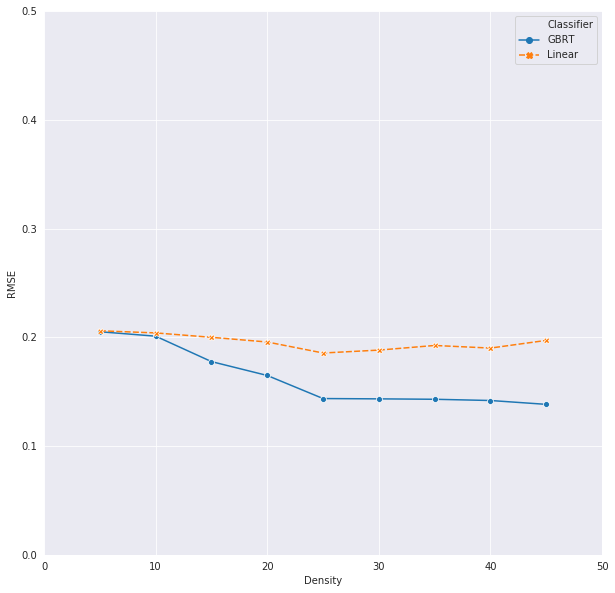

In [61]:
plotter  = pd.DataFrame()
plotter['RMSE'] = metric_list 
plotter['Density'] = roi_list
plotter['Classifier'] = clf_list
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
plt.xlim(0,50)
plt.ylim(0,0.50)
sns.lineplot(y='RMSE',x='Density',data=plotter,hue='Classifier', style='Classifier', markers=True)



Reproduction of Figure 3 RMSE vs Density. We can see that GBRT performs better than linear regression. 

In [57]:
%%capture
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
#from circlemap import 
import math
from matplotlib.patches import Circle
metric_list = []
roi_list = []
clf_list = []
COLORBAR_ARGS = {'location': 'bottom', 'pad': '10%'}

#roi_densities = [0]
roi_densities = range(5,50,5)
GREENLAND_RADIUS = 1300

for roi_density in roi_densities:
    
    
        
    print ('center: ', center)
    X_train, y_train, X_test, y_test = split_with_circle(global_data, center,
                                       roi_density=roi_density, radius=GREENLAND_RADIUS)
    
    clf = GradientBoostingRegressor(loss='ls',learning_rate=0.05,n_estimators=1000,subsample=1,max_depth=4,max_features=0.3,verbose=0)

    clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
    y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))
    
    metric_list.append(r2_score(y_test,y_pred))    
    clf_list.append('GBRT')
    roi_list.append(roi_density)
    
    clf = LinearRegression()

    clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
    y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))

    
    #r2, rmse = error_summary(y_test, y_pred)
    metric_list.append(r2_score(y_test,y_pred))
    roi_list.append(roi_density)
    clf_list.append('Linear')
    
                
    

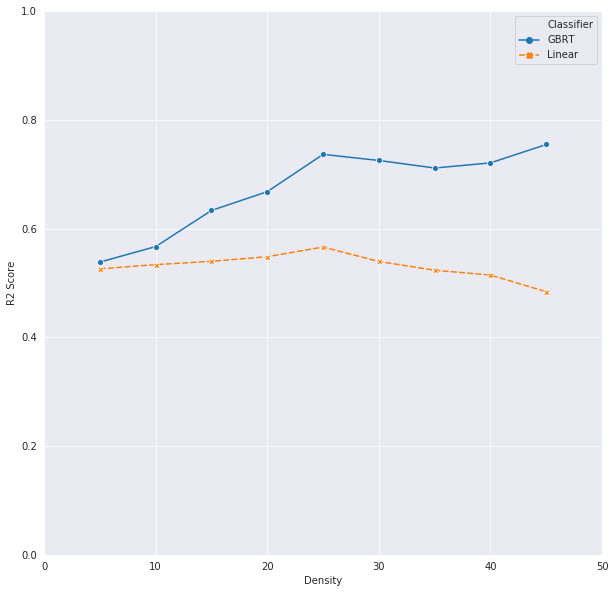

In [58]:
plotter  = pd.DataFrame()
plotter['R2 Score'] = metric_list 
plotter['Density'] = roi_list
plotter['Classifier'] = clf_list
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
plt.xlim(0,50)
plt.ylim(0,1.0)
sns.lineplot(y='R2 Score',x='Density',data=plotter,hue='Classifier', style='Classifier', markers=True)



Reproduction of Figure 3 R2 score vs Density. We can see that GBRT performs better than linear regression. 